# Notebook 01 – Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
file_path = "../data/Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)


# %%
# Basic Info
print(df.head())
print(df.info())
print(df.describe(include='all'))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Check missing values

In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Convert TotalCharges to numeric

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Fill missing TotalCharges

In [6]:
import numpy as np
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

Plot churn distribution

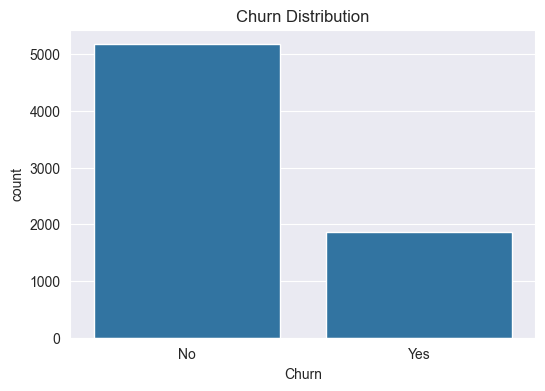

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

Visualize numerical distributions

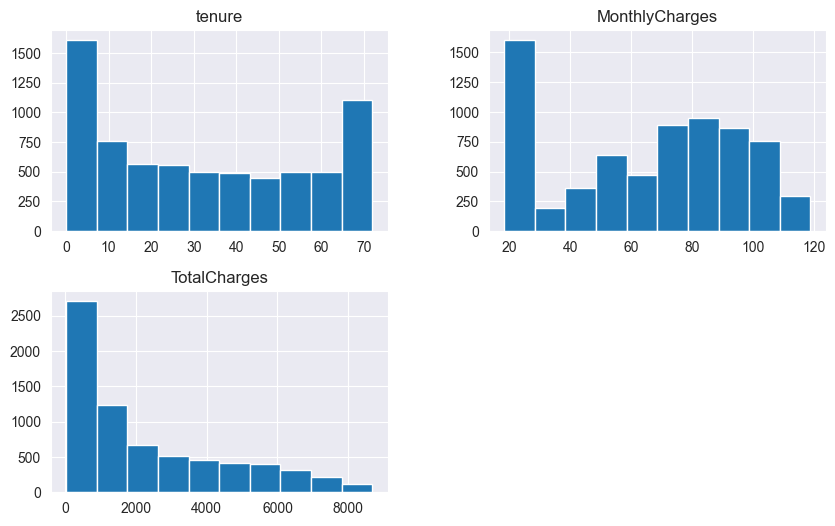

In [8]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(figsize=(10,6))
plt.show()

Correlation heatmap

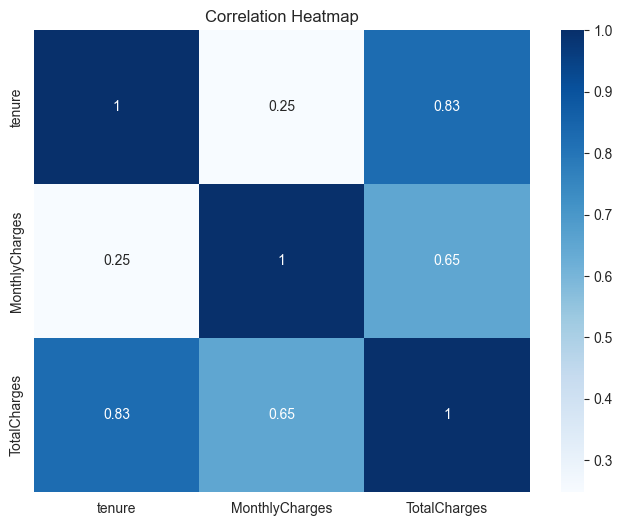

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

Churn by contract type

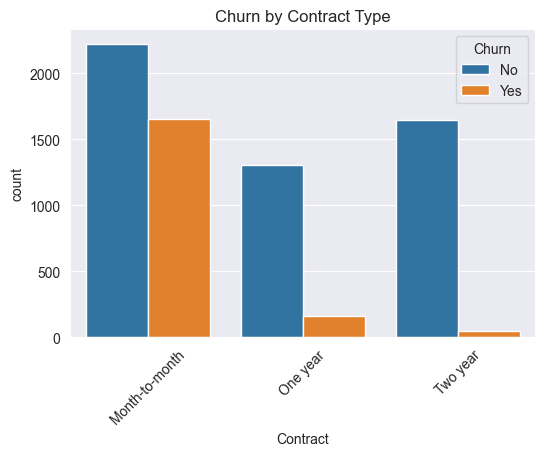

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xticks(rotation=45)
plt.show()

Save cleaned EDA-ready dataframe

In [12]:
EDA_ready_df = df.copy()
EDA_ready_df.to_csv("results/EDA_ready_telco.csv", index=False)
print("EDA completed and cleaned file saved.")

EDA completed and cleaned file saved.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


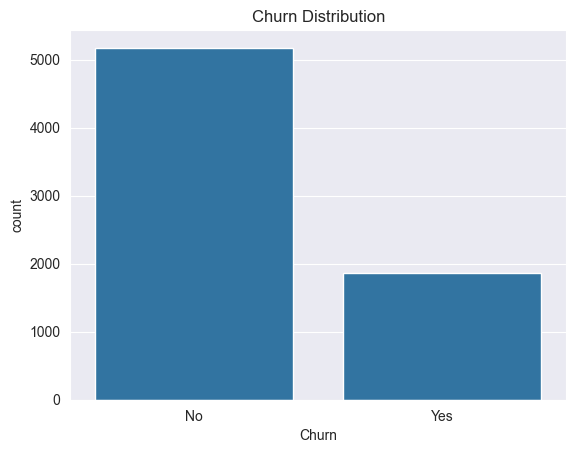

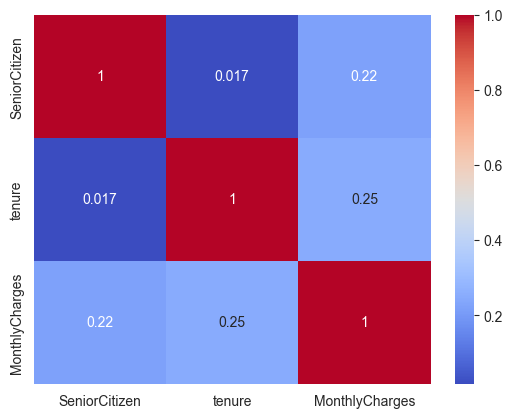

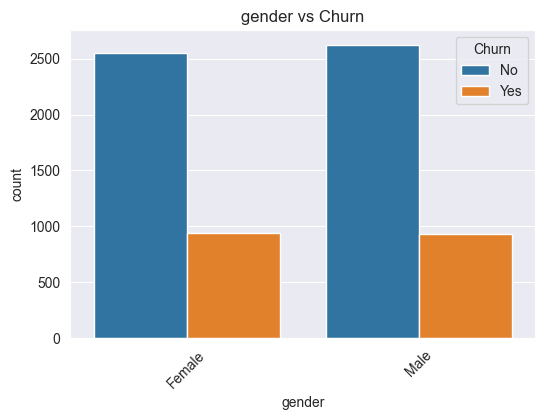

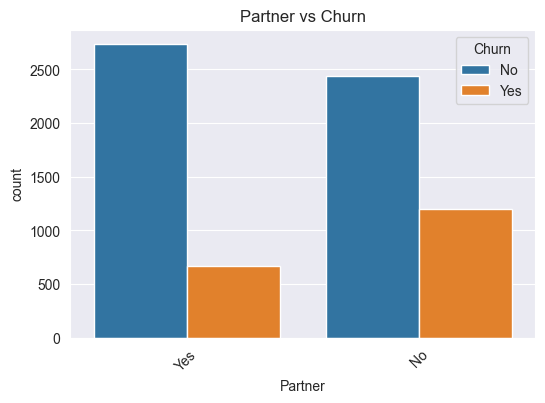

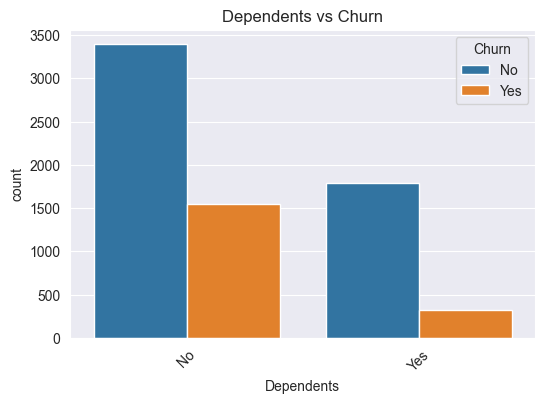

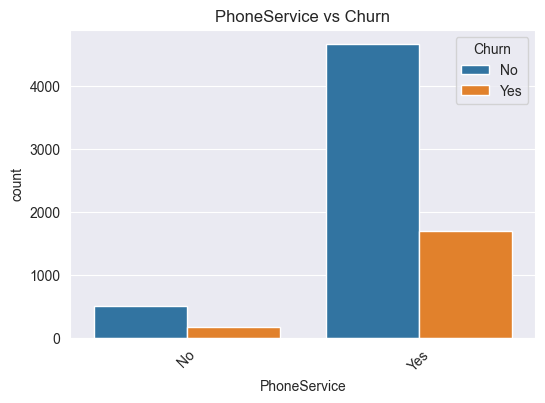

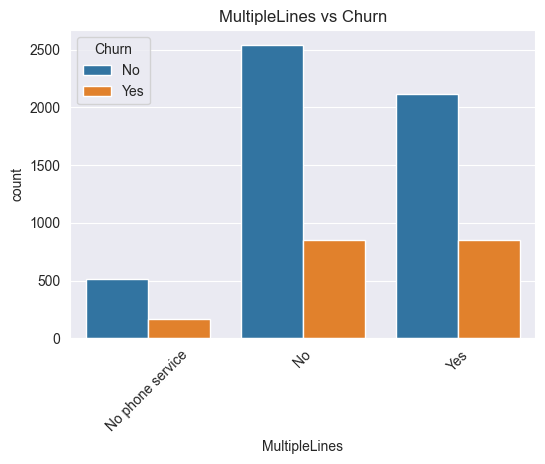

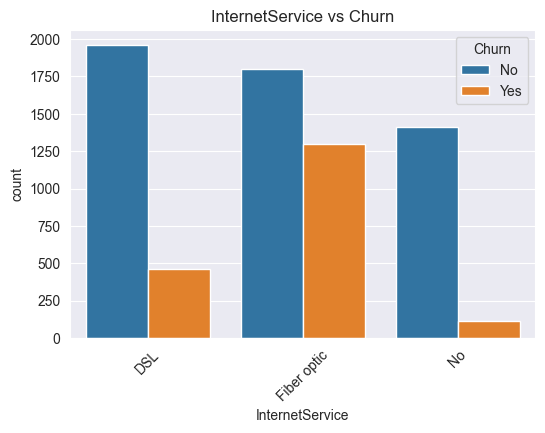

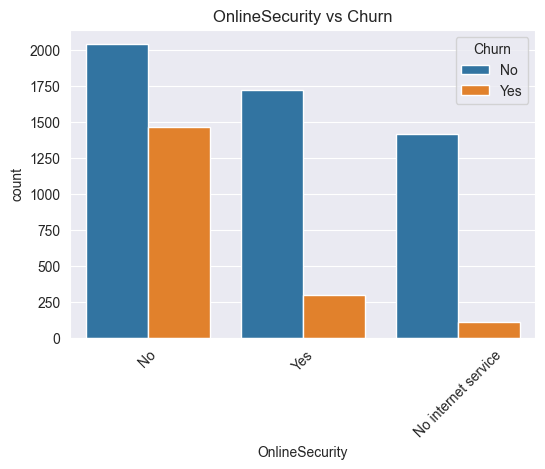

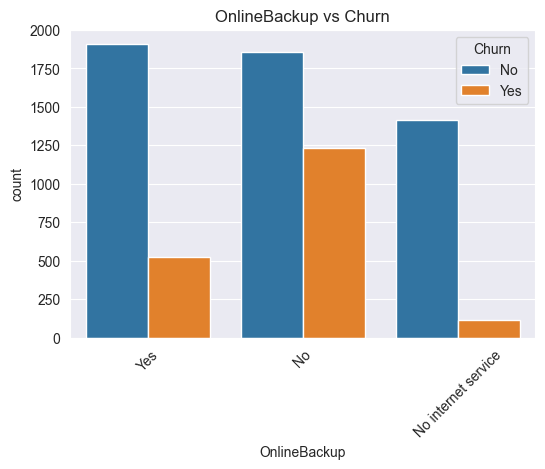

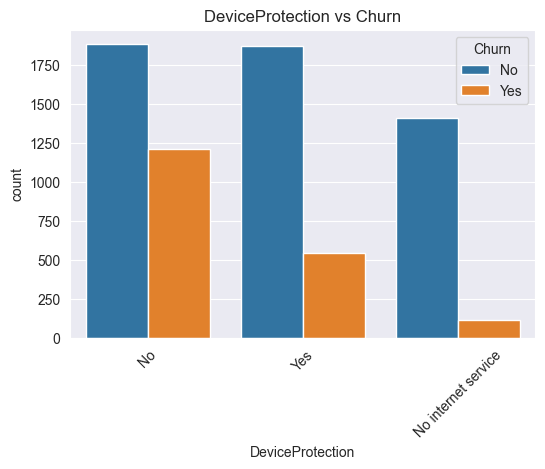

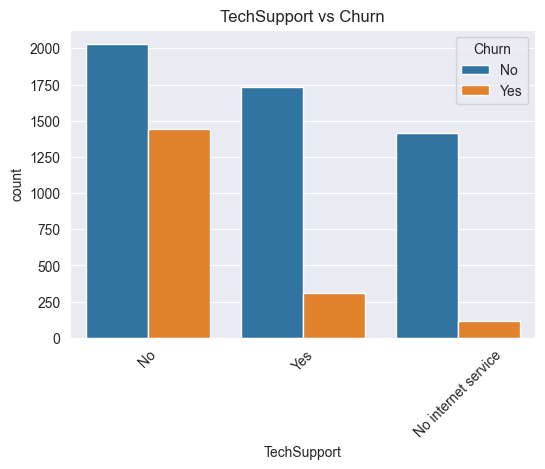

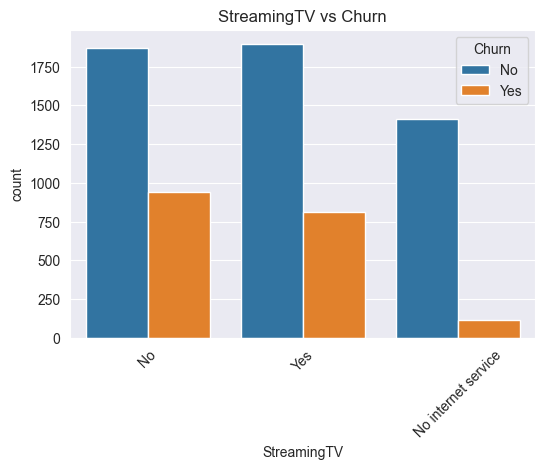

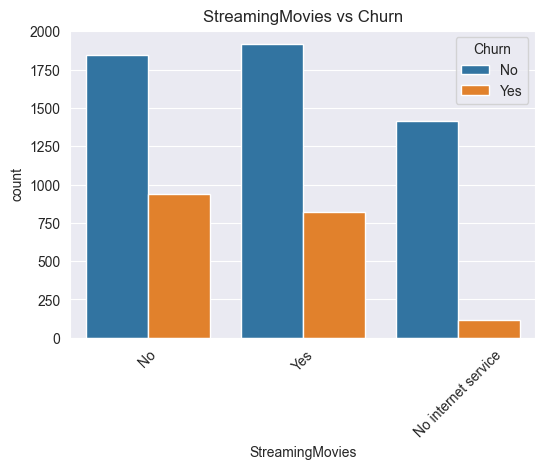

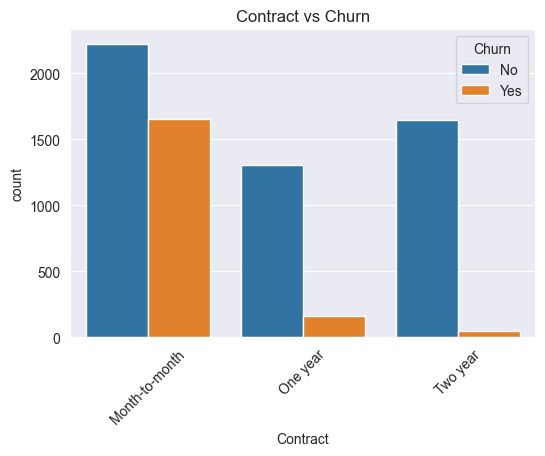

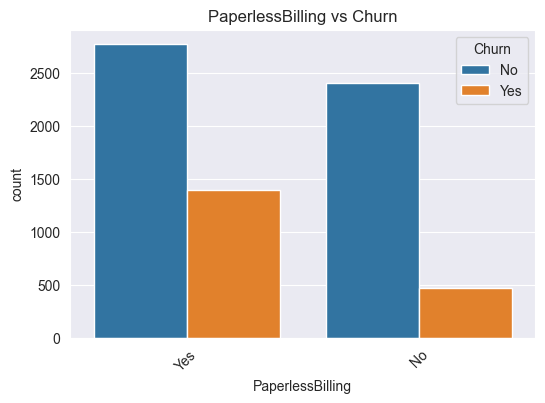

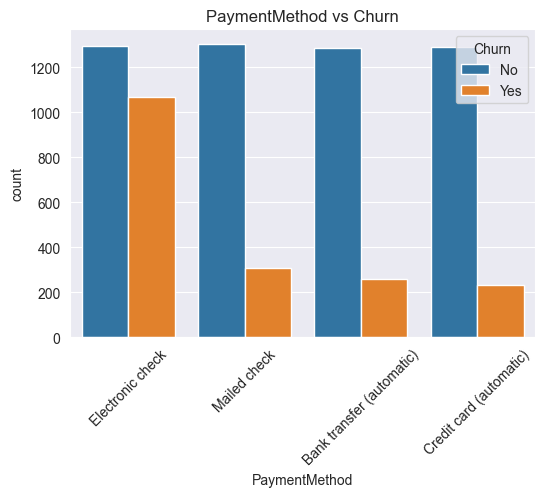

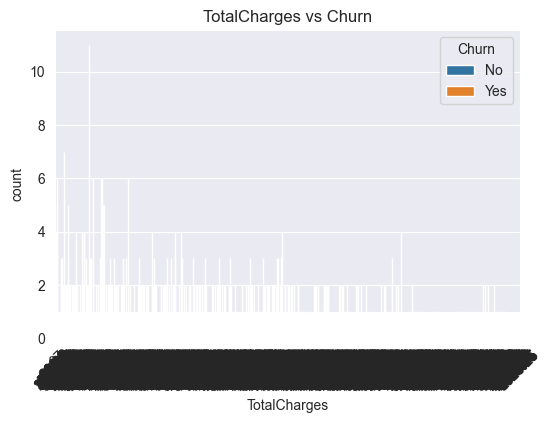

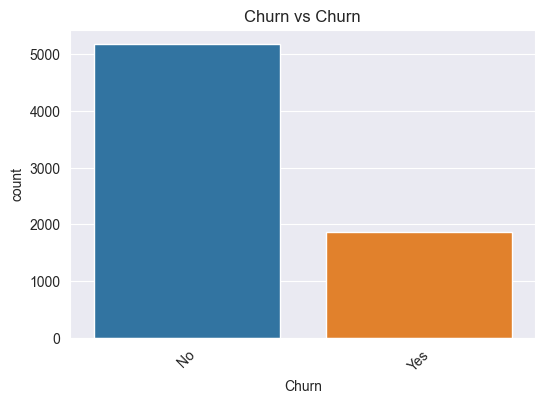

In [13]:
# %% [markdown]
# # Telco Customer Churn - Exploratory Data Analysis
# This notebook explores the dataset to understand distributions, missing values, and relationships.

# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %%
# Load dataset
data_path = r"C:\Users\USER\PycharmProjects\ML\data\Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)

# %%
# Basic info
df.info()
df.describe()

# %%
# Check missing values
df.isnull().sum()

# %%
# Visualize target distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

# %%
# Correlation heatmap for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

# %%
# Example categorical visualization
categorical_cols = df.select_dtypes(include=['object']).drop('customerID', axis=1).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()
